In [1]:
import pandas as pd
import numpy as np

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
import sklearn
from sklearn.preprocessing import PowerTransformer

In [79]:
from scipy import stats

In [73]:
def methd_(tgtSeries):
    des = tgtSeries.describe()
    display(pd.DataFrame(des).T)
    
    max1 = des["50%"] + 1 * des["std"]
    max2 = des["50%"] + 2 * des["std"]
    max3 = des["50%"] + 3 * des["std"]
    min1 = des["50%"] - 1 * des["std"]
    min2 = des["50%"] - 2 * des["std"]
    min3 = des["50%"] - 3 * des["std"]
    print("±１σ {:.3g}%".format( len(df[ (tgtSeries >= min1) & (tgtSeries <= max1) ])/len(df)*100 ))
    print("±２σ {:.3g}%".format( len(df[ (tgtSeries >= min2) & (tgtSeries <= max2) ])/len(df)*100 ))
    print("±３σ {:.3g}%".format( len(df[ (tgtSeries >= min3) & (tgtSeries <= max3) ])/len(df)*100 ))
    
    fig, axes = plt.subplots(ncols=3, figsize=(15,4))
    sns.distplot(tgtSeries, ax=axes[0])
    sns.distplot(tgtSeries, ax=axes[1], bins = 20)
    sns.boxplot(tgtSeries, ax=axes[2])
    plt.show()

--------------

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)

In [27]:
df.shape

(150, 4)

In [21]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [23]:
df =df.rename(
    columns = {"sepal length (cm)" :"sl",
               "sepal width (cm)"  :"sw",
               "petal length (cm)" :"pl",
               "petal width (cm)"  :"pw"
              }
)
df.head(3)

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


★★★　そのまま　★★★


,count,mean,std,min,25%,50%,75%,max
pw,150.0,1.199333,0.762238,0.1,0.3,1.3,1.8,2.5


±１σ 52%
±２σ 100%
±３σ 100%


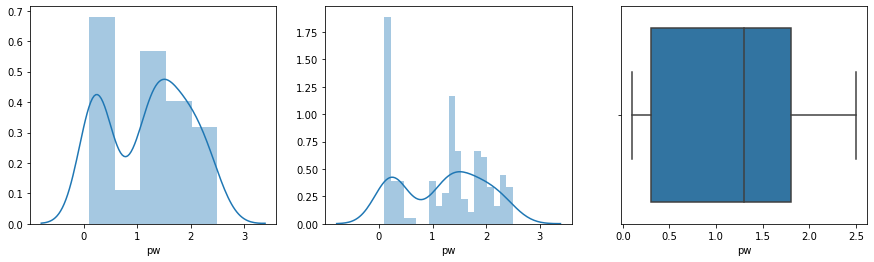

★★★　平方根　★★★


,count,mean,std,min,25%,50%,75%,max
pw,150.0,1.018096,0.404855,0.316228,0.547723,1.140175,1.341641,1.581139


±１σ 63.3%
±２σ 96.7%
±３σ 100%


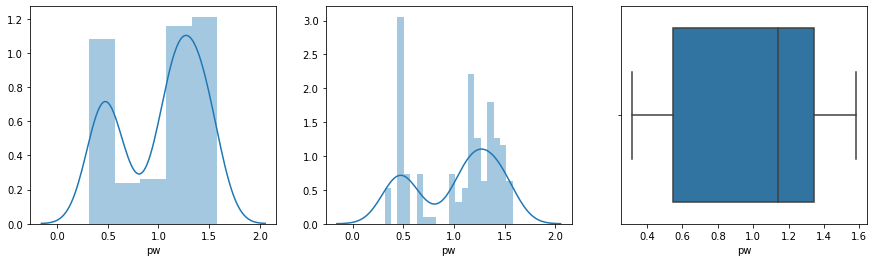

★★★　対数log　★★★


,count,mean,std,min,25%,50%,75%,max
pw,150.0,-0.172323,0.983,-2.302585,-1.203973,0.262364,0.587787,0.916291


±１σ 68%
±２σ 96.7%
±３σ 100%


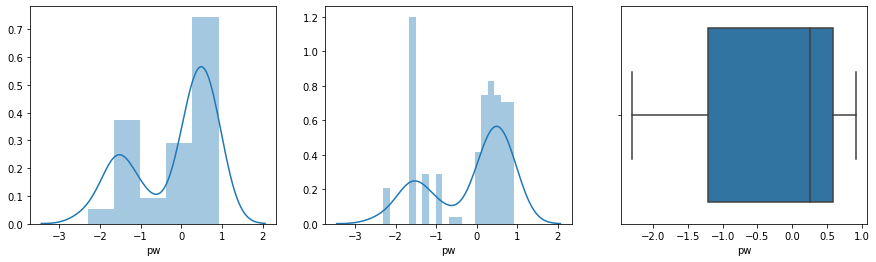

★★★　2乗　★★★


,count,mean,std,min,25%,50%,75%,max
pw,150.0,2.015533,1.830209,0.01,0.09,1.69,3.24,6.25


±１σ 77.3%
±２σ 96%
±３σ 100%


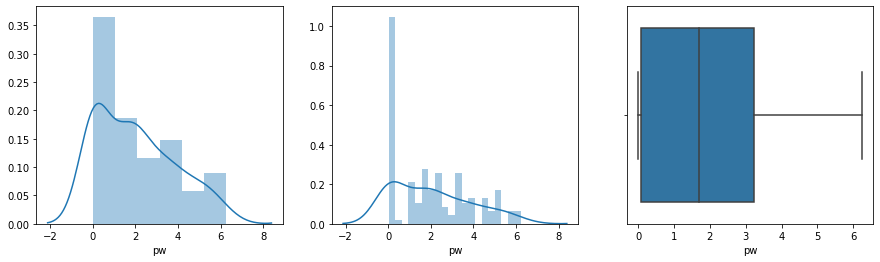

★★★　PowerTransform(Yeo-Johnson)　★★★


,count,mean,std,min,25%,50%,75%,max
0,150.0,-4.263256e-16,1.00335,-1.476845,-1.189599,0.159679,0.79649,1.658549


±１σ 52%
±２σ 100%
±３σ 100%


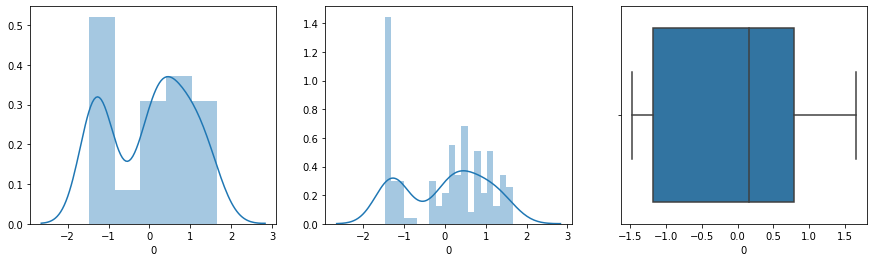

★★★　PowerTransform(box-cox)　★★★


,count,mean,std,min,25%,50%,75%,max
0,150.0,-4.736952e-17,1.00335,-1.64318,-1.179688,0.255282,0.802563,1.484407


±１σ 58%
±２σ 100%
±３σ 100%


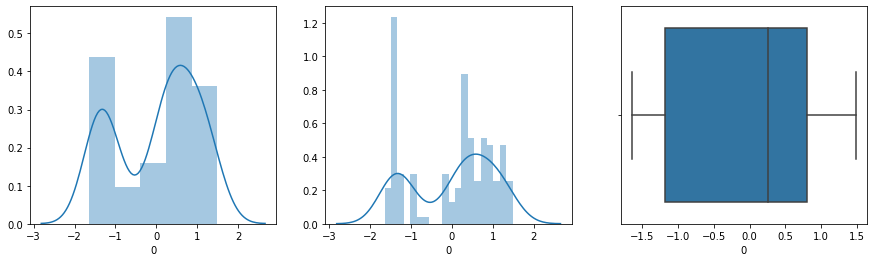

In [109]:
tgt = df["pw"]
print("★★★　そのまま　★★★")
methd_(tgt)

print("★★★　平方根　★★★")
methd_(np.sqrt(tgt))

print("★★★　対数log　★★★")
methd_(np.log(tgt))

print("★★★　2乗　★★★")
methd_(pow(tgt,2))

#print("★★★　boxcox　★★★")
#boxcox, _ = stats.boxcox(tgt)
#methd_(pd.DataFrame(boxcox)[0])

print("★★★　PowerTransform(Yeo-Johnson)　★★★")
pt = PowerTransformer()
fix_tgt = tgt.fillna(tgt.median)
pt_tgt = pd.DataFrame(pt.fit_transform(pd.DataFrame(fix_tgt)))[0]
methd_(pt_tgt)

print("★★★　PowerTransform(box-cox)　★★★")
pt = PowerTransformer(method='box-cox')
fix_tgt = tgt.fillna(tgt.median)
fix_tgt = fix_tgt + tgt.min()/1000
pt_tgt = pd.DataFrame(pt.fit_transform(pd.DataFrame(fix_tgt)))[0]
methd_(pt_tgt)

In [84]:
pt_tgt

0     -1.002438
1     -1.002438
2     -1.002438
3     -1.002438
4     -1.002438
         ...   
145    1.101904
146    0.794673
147    0.873484
148    1.101904
149    0.714367
Name: 0, Length: 150, dtype: float64

In [93]:
pt = PowerTransformer()
pd.DataFrame(pt.fit_transform(pd.DataFrame(tgt)))[0]

0     -1.332266
1     -1.332266
2     -1.332266
3     -1.332266
4     -1.332266
         ...   
145    1.415316
146    0.921577
147    1.045977
148    1.415316
149    0.796490
Name: 0, Length: 150, dtype: float64

In [97]:
type(pd.DataFrame(boxcox)[0])
pd.DataFrame(boxcox)[0]

0     -1.002438
1     -1.002438
2     -1.002438
3     -1.002438
4     -1.002438
         ...   
145    1.101904
146    0.794673
147    0.873484
148    1.101904
149    0.714367
Name: 0, Length: 150, dtype: float64

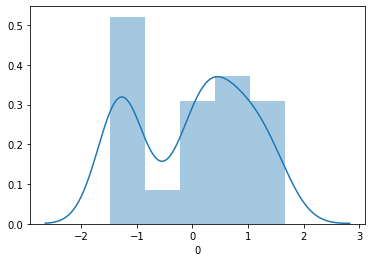

In [100]:
type(pd.DataFrame(pt.fit_transform(pd.DataFrame(tgt)))[0])
pd.DataFrame(pt.fit_transform(pd.DataFrame(tgt)))[0]

sns.distplot( pd.DataFrame(pt.fit_transform(pd.DataFrame(tgt)))[0] )

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: pw, Length: 150, dtype: float64